# DATA PREPARATION

In [1]:
import numpy as np

## 1) Load and normalize datasets

In [2]:
# Load training data
X_train_a = np.load(file="/kaggle/input/task-5-2-data/Xtrain2_a.npy")
y_train_a = np.load(file="/kaggle/input/task-5-2-data/Ytrain2_a.npy")

X_train_b = np.load(file="/kaggle/input/task-5-2-data/Xtrain2_b.npy")
y_train_b = np.load(file="/kaggle/input/task-5-2-data/Ytrain2_b.npy")

# Load test data
X_test_a = np.load(file="/kaggle/input/task-5-2-data/Xtest2_a.npy")
X_test_b = np.load(file="/kaggle/input/task-5-2-data/Xtest2_b.npy")

print("Format a shapes:")
print(f"X_train_a shape: {X_train_a.shape}")
print(f"y_train_a shape: {y_train_a.shape}")
print(f"X_test_a shape: {X_test_a.shape}\n")

print("Format b shapes:")
print(f"X_train_b shape: {X_train_b.shape}")
print(f"y_train_b shape: {y_train_b.shape}")
print(f"X_test_b shape: {X_test_b.shape}\n")

# Normalize datasets
X_train_a = X_train_a.astype('float32') / 255.0
X_test_a = X_test_a.astype('float32') / 255.0

X_train_b = X_train_b.astype('float32') / 255.0
X_test_b = X_test_b.astype('float32') / 255.0

Format a shapes:
X_train_a shape: (964908, 49)
y_train_a shape: (964908,)
X_test_a shape: (345744, 49)

Format b shapes:
X_train_b shape: (547, 2304)
y_train_b shape: (547, 2304)
X_test_b shape: (196, 2304)



## 2) Check imbalance

In [3]:
def get_imbalance(y, data_format):
    if data_format == "a":
        num_crater_pixels = sum(y)
        num_no_crater_pixels = len(y) - num_crater_pixels
        total = num_no_crater_pixels + num_crater_pixels

        print("\tCheck imbalance (format a):")
        print(f"\tClass 0 (No crater pixel): {num_no_crater_pixels} ({num_no_crater_pixels / total * 100:.2f} %)")
        print(f"\tClass 1 (Crater pixel): {num_crater_pixels} ({num_crater_pixels / total * 100:.2f} %)")
    
    elif data_format == "b":   
        num_crater_pixels = len([1 for pixel in y.flatten() if pixel == 1])
        num_no_crater_pixels = len([0 for pixel in y.flatten() if pixel == 0])
        total = num_no_crater_pixels + num_crater_pixels

        print("\tCheck imbalance (format b):")
        print(f"\tClass 0 (No crater pixel): {num_no_crater_pixels} ({num_no_crater_pixels / total * 100:.2f} %)")
        print(f"\tClass 1 (Crater pixel): {num_crater_pixels} ({num_crater_pixels / total * 100:.2f} %)")
    else:
        raise ValueError("Provide a valid format of y_data: either data_format='a' or data_format='b'.")


get_imbalance(y=y_train_a, data_format="a")
get_imbalance(y=y_train_b, data_format="b")

	Check imbalance (format a):
	Class 0 (No crater pixel): 649624.0 (67.32 %)
	Class 1 (Crater pixel): 315284.0 (32.68 %)
	Check imbalance (format b):
	Class 0 (No crater pixel): 896429 (71.13 %)
	Class 1 (Crater pixel): 363859 (28.87 %)


# MODELS USING FORMAT A

In [4]:
"""from colorama import Fore
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from cuml.ensemble import RandomForestClassifier as cuRandomForest
from cuml.neighbors import KNeighborsClassifier as cuKNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt"""

'from colorama import Fore\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix\nfrom cuml.ensemble import RandomForestClassifier as cuRandomForest\nfrom cuml.neighbors import KNeighborsClassifier as cuKNN\nimport numpy as np\nimport tensorflow as tf\nimport matplotlib.pyplot as plt'

### Handle Imbalance with SMOTE

In [5]:
"""def oversample_dataset(X, y, data_format, smote=False):
    def use_smote(X, y, data_format):
        # Print class imbalance before applying SMOTE
        print("Before " + Fore.YELLOW + "SMOTE" + Fore.RESET + ":")
        get_imbalance(y=y, data_format=data_format)

        # Apply SMOTE
        smote = SMOTE(k_neighbors=3, sampling_strategy='minority', random_state=42)
        X_oversampled, y_oversampled = smote.fit_resample(X=X, y=y)

        # Print class imbalance after applying SMOTE
        print("After " + Fore.YELLOW + "SMOTE" + Fore.RESET + ":")
        get_imbalance(y=y_oversampled, data_format=data_format)

        return X_oversampled, y_oversampled

    if smote and (data_format != None):
        # Apply SMOTE to balance the dataset
        return use_smote(X=X, y=y, data_format=data_format)
    else:
        # Raise an error if none of the methods are selected
        raise ValueError("At least one method ('smote' or 'img_data_gen') must be True to perform oversampling.")
        
        
X_oversampled_a, y_oversampled_a = oversample_dataset(X=X_train_a, y=y_train_a, data_format="a", smote=True)
print(X_oversampled_a.shape, y_oversampled_a.shape)"""

'def oversample_dataset(X, y, data_format, smote=False):\n    def use_smote(X, y, data_format):\n        # Print class imbalance before applying SMOTE\n        print("Before " + Fore.YELLOW + "SMOTE" + Fore.RESET + ":")\n        get_imbalance(y=y, data_format=data_format)\n\n        # Apply SMOTE\n        smote = SMOTE(k_neighbors=3, sampling_strategy=\'minority\', random_state=42)\n        X_oversampled, y_oversampled = smote.fit_resample(X=X, y=y)\n\n        # Print class imbalance after applying SMOTE\n        print("After " + Fore.YELLOW + "SMOTE" + Fore.RESET + ":")\n        get_imbalance(y=y_oversampled, data_format=data_format)\n\n        return X_oversampled, y_oversampled\n\n    if smote and (data_format != None):\n        # Apply SMOTE to balance the dataset\n        return use_smote(X=X, y=y, data_format=data_format)\n    else:\n        # Raise an error if none of the methods are selected\n        raise ValueError("At least one method (\'smote\' or \'img_data_gen\') must be 

### Split Data into Training, Validation, and Test Sets

In [6]:
"""def split_data(X, y):
    # First, split off 80% for training and 20% for validation + test
    X_train_split, X_tmp_split, y_train_split, y_tmp_split = train_test_split(
        X, 
        y, 
        test_size=0.2,  # 20% for validation and test
        shuffle=True,   # Shuffle the data
        random_state=42, # Ensure reproducibility
        stratify=y # Stratify based on labels to ensure class balance
    )

    # Now, split the remaining 20% into 10% validation and 10% test
    X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(
        X_tmp_split, 
        y_tmp_split, 
        test_size=0.5,
        shuffle=True,
        random_state=42
    )

    return X_train_split, y_train_split, X_val_split, y_val_split, X_test_split, y_test_split


X_train_split, y_train_split, X_val_split, y_val_split, X_test_split, y_test_split = split_data(
    X=X_oversampled_a, 
    y=y_oversampled_a
)

print("After " + Fore.YELLOW + "Training split" + Fore.RESET + ":")
get_imbalance(y=y_train_split, data_format="a")

print(X_train_split.shape, y_train_split.shape)
print(X_val_split.shape, y_val_split.shape)
print(X_test_split.shape, y_test_split.shape)"""

'def split_data(X, y):\n    # First, split off 80% for training and 20% for validation + test\n    X_train_split, X_tmp_split, y_train_split, y_tmp_split = train_test_split(\n        X, \n        y, \n        test_size=0.2,  # 20% for validation and test\n        shuffle=True,   # Shuffle the data\n        random_state=42, # Ensure reproducibility\n        stratify=y # Stratify based on labels to ensure class balance\n    )\n\n    # Now, split the remaining 20% into 10% validation and 10% test\n    X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(\n        X_tmp_split, \n        y_tmp_split, \n        test_size=0.5,\n        shuffle=True,\n        random_state=42\n    )\n\n    return X_train_split, y_train_split, X_val_split, y_val_split, X_test_split, y_test_split\n\n\nX_train_split, y_train_split, X_val_split, y_val_split, X_test_split, y_test_split = split_data(\n    X=X_oversampled_a, \n    y=y_oversampled_a\n)\n\nprint("After " + Fore.YELLOW + "Training spli

## 1) K-Nearest Neighbours (K-NN)

In [7]:
"""def knn_model(X_train, y_train, X_val, y_val):
    best_k = None
    best_acc_score = 0

    # Iterate over k values from 1 to 10 to find the best k based on balanced accuracy score
    for k in range(1, 10):
        model = cuKNN(n_neighbors=k)
        model.fit(X=X_train, y=y_train)  # Train k-NN on the training set
        
        # Predict on validation set
        y_val_pred = model.predict(X=X_val)
        current_acc_score = balanced_accuracy_score(y_true=y_val, y_pred=y_val_pred)

        # Print the current k and accuracy score
        print(f"k = {k}, ACC-Score = {current_acc_score}")
        
        # Track the best k based on the highest balanced accuracy score
        if current_acc_score > best_acc_score:
            best_acc_score = current_acc_score
            best_k = k
    
    # Print the final best k and accuracy score
    print("---------------------------")
    print("Using " + Fore.YELLOW + "K-Nearest Neighbours (k-NN)" + Fore.RESET + ":")
    print(f"\tBest k = {best_k}\n\tACC score = {best_acc_score:.4f}")

    # Train final model with the best k
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X=X_train, y=y_train)
    
    return model


# K-Nearest Neighbours (K-NN)
knn_model_instance = knn_model(X_train=X_train_split, y_train=y_train_split, X_val=X_test_split, y_val=y_test_split)"""

'def knn_model(X_train, y_train, X_val, y_val):\n    best_k = None\n    best_acc_score = 0\n\n    # Iterate over k values from 1 to 10 to find the best k based on balanced accuracy score\n    for k in range(1, 10):\n        model = cuKNN(n_neighbors=k)\n        model.fit(X=X_train, y=y_train)  # Train k-NN on the training set\n        \n        # Predict on validation set\n        y_val_pred = model.predict(X=X_val)\n        current_acc_score = balanced_accuracy_score(y_true=y_val, y_pred=y_val_pred)\n\n        # Print the current k and accuracy score\n        print(f"k = {k}, ACC-Score = {current_acc_score}")\n        \n        # Track the best k based on the highest balanced accuracy score\n        if current_acc_score > best_acc_score:\n            best_acc_score = current_acc_score\n            best_k = k\n    \n    # Print the final best k and accuracy score\n    print("---------------------------")\n    print("Using " + Fore.YELLOW + "K-Nearest Neighbours (k-NN)" + Fore.RESET + "

## 2) Random Forest

In [8]:
"""def random_forest_model(X_train, y_train, X_val, y_val):
    n_estimators_list = [50, 100, 150, 200, 250]
    best_acc_score = 0
    best_n_estimators = None
    
    for n_estimators in n_estimators_list:
        print(f"\nTraining cuML RandomForest with n_estimators={n_estimators}")
        
        # Initialize the cuML RandomForestClassifier with current n_estimators
        model = cuRandomForest(n_estimators=n_estimators, n_streams=1, random_state=42)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on validation data
        y_pred_val = model.predict(X_val)
        
        # Calculate balanced accuracy score
        val_score = balanced_accuracy_score(y_val, y_pred_val)
        
        # Print the current n_estimators and accuracy score
        print(f"n_estimators = {n_estimators}, ACC-Score = {val_score:.4f}")

        # Track the best n_estimators based on the highest balanced accuracy score
        if val_score > best_acc_score:
            best_acc_score = val_score
            best_n_estimators = n_estimators
        
    # Print the final best n_estimators and accuracy score
    print("---------------------------")
    print("Using " + Fore.YELLOW + "Random Forest" + Fore.RESET + ":")
    print(f"\tBest n_estimators = {best_n_estimators}\n\tACC score = {best_acc_score:.4f}")
    
    return model


model = random_forest_model(X_train=X_train_split, y_train=y_train_split, X_val=X_test_split, y_val=y_test_split)"""

'def random_forest_model(X_train, y_train, X_val, y_val):\n    n_estimators_list = [50, 100, 150, 200, 250]\n    best_acc_score = 0\n    best_n_estimators = None\n    \n    for n_estimators in n_estimators_list:\n        print(f"\nTraining cuML RandomForest with n_estimators={n_estimators}")\n        \n        # Initialize the cuML RandomForestClassifier with current n_estimators\n        model = cuRandomForest(n_estimators=n_estimators, n_streams=1, random_state=42)\n        \n        # Train the model\n        model.fit(X_train, y_train)\n        \n        # Predict on validation data\n        y_pred_val = model.predict(X_val)\n        \n        # Calculate balanced accuracy score\n        val_score = balanced_accuracy_score(y_val, y_pred_val)\n        \n        # Print the current n_estimators and accuracy score\n        print(f"n_estimators = {n_estimators}, ACC-Score = {val_score:.4f}")\n\n        # Track the best n_estimators based on the highest balanced accuracy score\n        

## 3) Multy-Layer-Perceptron (MLP)

In [9]:
"""# Convert labels to float32
y_train_split_mlp = y_train_split.astype('float32')
y_val_split_mlp = y_val_split.astype('float32')
y_test_split_mlp = y_test_split.astype('float32')"""

"# Convert labels to float32\ny_train_split_mlp = y_train_split.astype('float32')\ny_val_split_mlp = y_val_split.astype('float32')\ny_test_split_mlp = y_test_split.astype('float32')"

### a) Build and Train

In [10]:
"""def build_mlp_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(input_dim,)),  # Using Input layer here
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

input_dim = X_train_split.shape[1]
mlp_model = build_mlp_model(input_dim)
mlp_model.summary()

# Train the model
print("X_train_split shape:", X_train_split.shape)  # Should be (n_samples, 2304)
print("y_train_split shape:", y_train_split.shape)  # Should be (n_samples,)

# Set early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = mlp_model.fit(
    X_train_split, y_train_split_mlp,
    validation_data=(X_val_split, y_val_split_mlp),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)"""

'def build_mlp_model(input_dim):\n    model = tf.keras.Sequential([\n        tf.keras.Input(shape=(input_dim,)),  # Using Input layer here\n        tf.keras.layers.Dense(units=128, activation=\'relu\'),\n        tf.keras.layers.Dense(units=64, activation=\'relu\'),\n        tf.keras.layers.Dense(units=1, activation=\'sigmoid\')  # Binary classification\n    ])\n    # Compile the model\n    model.compile(optimizer=\'adam\',\n                  loss=\'binary_crossentropy\',\n                  metrics=[\'accuracy\'])\n    return model\n\ninput_dim = X_train_split.shape[1]\nmlp_model = build_mlp_model(input_dim)\nmlp_model.summary()\n\n# Train the model\nprint("X_train_split shape:", X_train_split.shape)  # Should be (n_samples, 2304)\nprint("y_train_split shape:", y_train_split.shape)  # Should be (n_samples,)\n\n# Set early stopping to prevent overfitting\nearly_stopping = tf.keras.callbacks.EarlyStopping(\n    monitor=\'val_loss\',\n    patience=5,\n    restore_best_weights=True\n)\n\n# 

### b) Evaluate the Model
####  Plot Training History

In [11]:
"""# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))

# First subplot for accuracy
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

# Make the spines thicker for the accuracy plot
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)

# Second subplot for loss
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

# Make the spines thicker for the loss plot
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.savefig("/kaggle/working/mlp_acc_loss.png", bbox_inches='tight')
plt.show()"""

'# Plot training & validation accuracy values\nplt.figure(figsize=(10, 4))\n\n# First subplot for accuracy\nax1 = plt.subplot(1, 2, 1)\nax1.plot(history.history[\'accuracy\'], label=\'Train\')\nax1.plot(history.history[\'val_accuracy\'], label=\'Validation\')\nax1.set_ylabel(\'Accuracy\')\nax1.set_xlabel(\'Epoch\')\nax1.legend()\n\n# Make the spines thicker for the accuracy plot\nfor spine in ax1.spines.values():\n    spine.set_linewidth(1.5)\n\n# Second subplot for loss\nax2 = plt.subplot(1, 2, 2)\nax2.plot(history.history[\'loss\'], label=\'Train\')\nax2.plot(history.history[\'val_loss\'], label=\'Validation\')\nax2.set_ylabel(\'Loss\')\nax2.set_xlabel(\'Epoch\')\nax2.legend()\n\n# Make the spines thicker for the loss plot\nfor spine in ax2.spines.values():\n    spine.set_linewidth(1.5)\n\nplt.tight_layout()\nplt.savefig("/kaggle/working/mlp_acc_loss.png", bbox_inches=\'tight\')\nplt.show()'

#### Predict on Test Subset

In [12]:
"""# Predict on test data
y_pred_test = mlp_model.predict(X_test_split)
# Convert probabilities to class labels
y_pred_test_classes = (y_pred_test > 0.5).astype("int32").flatten()

# Calculate balanced accuracy
test_balanced_accuracy = balanced_accuracy_score(y_test_split_mlp, y_pred_test_classes)
print("---------------------------")
print("Using " + Fore.YELLOW + "MLP" + Fore.RESET + ":")
print(f"\tBalanced Accuracy on Test Set: {test_balanced_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_split_mlp, y_pred_test_classes))"""

'# Predict on test data\ny_pred_test = mlp_model.predict(X_test_split)\n# Convert probabilities to class labels\ny_pred_test_classes = (y_pred_test > 0.5).astype("int32").flatten()\n\n# Calculate balanced accuracy\ntest_balanced_accuracy = balanced_accuracy_score(y_test_split_mlp, y_pred_test_classes)\nprint("---------------------------")\nprint("Using " + Fore.YELLOW + "MLP" + Fore.RESET + ":")\nprint(f"\tBalanced Accuracy on Test Set: {test_balanced_accuracy:.4f}")\n\n# Classification report\nprint("\nClassification Report:")\nprint(classification_report(y_test_split_mlp, y_pred_test_classes))'

# MODELS USING FORMAT B

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from colorama import Fore
import matplotlib.pyplot as plt


np.random.seed(42)
strategy = tf.distribute.MirroredStrategy()

### Augment data

In [14]:
def augment_data(X, y):    
    augmented_X = []
    augmented_y = []
    
    for img, mask in zip(X, y):
        # Append original image and mask
        augmented_X.append(img)
        augmented_y.append(mask)
        
        # Reshape img and mask to (48, 48)
        img_reshaped = img.reshape(48, 48)
        mask_reshaped = mask.reshape(48, 48)
        
        angle = np.random.choice([1, 2, 3])
        # Rotate the reshaped image and mask
        rotated_img = np.rot90(img_reshaped, angle)
        rotated_mask = np.rot90(mask_reshaped, angle)
        
        # Flatten back to (2304,)
        augmented_X.append(rotated_img.flatten())
        augmented_y.append(rotated_mask.flatten())
    
    return np.array(augmented_X), np.array(augmented_y)


# Check the shapes before and after augmentation
print(X_train_b.shape, y_train_b.shape)
print(X_train_b)
X_augmented_b, y_augmented_b = augment_data(X=X_train_b, y=y_train_b)
print(X_augmented_b.shape, y_augmented_b.shape) 
print(X_augmented_b)


(547, 2304) (547, 2304)
[[0.5137255  0.4862745  0.4745098  ... 0.3882353  0.41568628 0.40392157]
 [0.5686275  0.58431375 0.5882353  ... 0.56078434 0.5137255  0.49803922]
 [0.5686275  0.3764706  0.44705883 ... 0.46666667 0.4627451  0.49411765]
 ...
 [0.4745098  0.4509804  0.42745098 ... 0.45882353 0.45882353 0.45490196]
 [0.49411765 0.4627451  0.47843137 ... 0.49411765 0.53333336 0.5254902 ]
 [0.49803922 0.6        0.7647059  ... 0.54901963 0.5176471  0.5764706 ]]
(1094, 2304) (1094, 2304)
[[0.5137255  0.4862745  0.4745098  ... 0.3882353  0.41568628 0.40392157]
 [0.33333334 0.5176471  0.5921569  ... 0.5176471  0.49411765 0.47058824]
 [0.5686275  0.58431375 0.5882353  ... 0.56078434 0.5137255  0.49803922]
 ...
 [0.5254902  0.53333336 0.49411765 ... 0.47843137 0.4627451  0.49411765]
 [0.49803922 0.6        0.7647059  ... 0.54901963 0.5176471  0.5764706 ]
 [0.45882353 0.43529412 0.43137255 ... 0.5372549  0.5254902  0.49019608]]


### Split Data into Training, Validation, and Test Sets

In [15]:
def split_data(X, y):
    # First, split off 80% for training and 20% for validation + test
    X_train_split, X_tmp_split, y_train_split, y_tmp_split = train_test_split(
        X, 
        y, 
        test_size=0.2,  # 20% for validation and test
        shuffle=True,   # Shuffle the data
        random_state=42 # Ensure reproducibility
    )

    # Now, split the remaining 20% into 10% validation and 10% test
    X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(
        X_tmp_split, 
        y_tmp_split, 
        test_size=0.5,
        shuffle=True,
        random_state=42
    )

    return X_train_split, y_train_split, X_val_split, y_val_split, X_test_split, y_test_split


X_train_split, y_train_split, X_val_split, y_val_split, X_test_split, y_test_split = split_data(
    X=X_augmented_b, 
    y=y_augmented_b
)

print("After " + Fore.YELLOW + "Training split" + Fore.RESET + ":")
get_imbalance(y=y_train_split, data_format="b")

print("After " + Fore.YELLOW + "Validation split" + Fore.RESET + ":")
get_imbalance(y=y_val_split, data_format="b")

print("After " + Fore.YELLOW + "Test split" + Fore.RESET + ":")
get_imbalance(y=y_test_split, data_format="b")

print(X_train_split.shape, y_train_split.shape)
print(X_val_split.shape, y_val_split.shape)
print(X_test_split.shape, y_test_split.shape)

After Training split:
	Check imbalance (format b):
	Class 0 (No crater pixel): 1428621 (70.86 %)
	Class 1 (Crater pixel): 587379 (29.14 %)
After Validation split:
	Check imbalance (format b):
	Class 0 (No crater pixel): 179704 (71.56 %)
	Class 1 (Crater pixel): 71432 (28.44 %)
After Test split:
	Check imbalance (format b):
	Class 0 (No crater pixel): 184533 (72.81 %)
	Class 1 (Crater pixel): 68907 (27.19 %)
(875, 2304) (875, 2304)
(109, 2304) (109, 2304)
(110, 2304) (110, 2304)


## 1) U-NET (Convulotional Neural Network)

### a) Reshape Data

In [16]:
# Ensure labels are of type float32
y_train_split = y_train_split.astype('float32')
y_val_split = y_val_split.astype('float32')
y_test_split = y_test_split.astype('float32')

X_train_split = X_train_split.reshape(-1, 48, 48, 1)
y_train_split = y_train_split.reshape(-1, 48, 48, 1)
X_val_split = X_val_split.reshape(-1, 48, 48, 1)
y_val_split = y_val_split.reshape(-1, 48, 48, 1)
X_test_split = X_test_split.reshape(-1, 48, 48, 1)
y_test_split = y_test_split.reshape(-1, 48, 48, 1)

X_test_b = X_test_b.reshape(-1, 48, 48, 1)

### b) Train Model

In [17]:
def unet_model():
    inputs = Input((48,48,1))
        
    # Contracting path
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.1)(c3)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.1)(c4)
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    
    up5 = UpSampling2D(size=(2, 2))(c4)
    up5 = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(up5)
    merge5 = concatenate([c3, up5], axis=3)
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge5)
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same')(c5)
    
    up6 = UpSampling2D(size=(2, 2))(c5)
    up6 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(up6)
    merge6 = concatenate([c2, up6], axis=3)
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge6)
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same')(c6)
    
    up7 = UpSampling2D(size=(2, 2))(c6)
    up7 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(up7)
    merge7 = concatenate([c1, up7], axis=3)
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge7)
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid', padding='same')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

def dice_coeff(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred, axis=-1)
    union = tf.reduce_sum(y_true, axis=-1) + tf.reduce_sum(y_pred, axis=-1)
    dice_coeff = (2 * intersection + smooth) / (union + smooth)
    return dice_coeff


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_split.flatten()), y=y_train_split.flatten())
class_weight_dict = dict(enumerate(class_weights))

with strategy.scope(): #this line allocates multiple GPUs for training in Kaggle
    model = unet_model()
    model.compile(loss = 'binary_crossentropy',
            optimizer=Adam(learning_rate=1e-3), 
            metrics = ['accuracy', dice_coeff])

#Defining early stopping to regularize the model and prevent overfitting
early_stopping = EarlyStopping(
    monitor = 'val_loss', 
    verbose=1, 
    patience = 10, 
    restore_best_weights = True, 
    mode='min'
)

#Training the model with 50 epochs (it will stop training in between because of early stopping)
history = model.fit(
    X_train_split, 
    y_train_split,
    batch_size=32,
    validation_data=(X_val_split, y_val_split),
    epochs = 50, 
    callbacks = [early_stopping],
    sample_weight=np.where(y_train_split == 1, class_weight_dict[1], class_weight_dict[0]),
    verbose = 1
)

Epoch 1/50


2024-10-26 18:14:23.465175: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_292/cond/StatefulPartitionedCall/functional_1_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.3921 - dice_coeff: 0.7041 - loss: 0.6883 - val_accuracy: 0.7045 - val_dice_coeff: 0.7407 - val_loss: 0.6302
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6376 - dice_coeff: 0.7158 - loss: 0.6846 - val_accuracy: 0.4278 - val_dice_coeff: 0.7046 - val_loss: 0.8120
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6189 - dice_coeff: 0.7299 - loss: 0.6425 - val_accuracy: 0.7320 - val_dice_coeff: 0.7596 - val_loss: 0.5558
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6744 - dice_coeff: 0.7443 - loss: 0.6185 - val_accuracy: 0.7052 - val_dice_coeff: 0.7662 - val_loss: 0.5703
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6945 - dice_coeff: 0.7501 - loss: 0.6090 - val_accuracy: 0.7582 - val_dice_coeff: 0.7604 - val_loss: 0.5445
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6978 - dice_coeff: 0.7535 - loss: 0.5976 - val_accuracy: 0.6875 - val_dice_coef

### c) Plot History

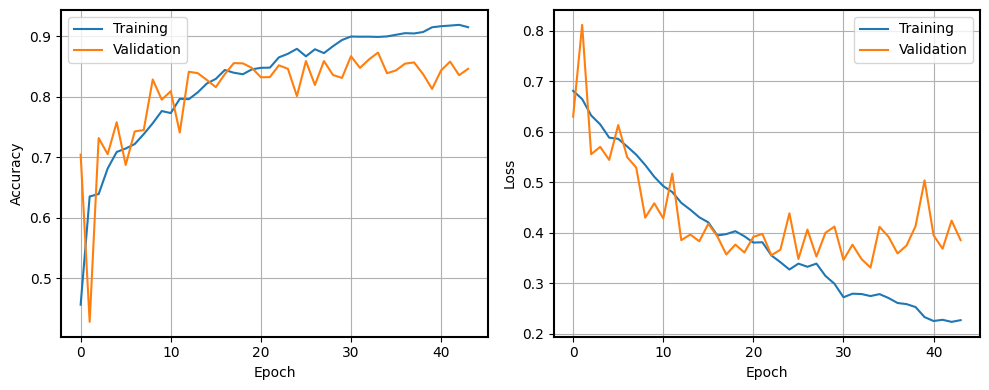

In [18]:
def plot_history(history):
    # Extract the metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(0, len(acc))

    # Create a single figure with 1 row and 3 columns for the plots
    plt.figure(figsize=(10,4))

    # Plot 1: Training and validation accuracy
    ax1 = plt.subplot(1, 2, 1)  # 1 row, 3 columns, first plot
    ax1.plot(epochs, acc, label='Training')
    ax1.plot(epochs, val_acc, label='Validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Make the spines thicker
    for spine in ax1.spines.values():
        spine.set_linewidth(1.5)

    # Plot 2: Training and validation loss
    ax2 = plt.subplot(1, 2, 2)  # 1 row, 3 columns, second plot
    ax2.plot(epochs, loss, label='Training')
    ax2.plot(epochs, val_loss, label='Validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    # Make the spines thicker
    for spine in ax2.spines.values():
        spine.set_linewidth(1.5)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
    
plot_history(history)

### d) Evaluate Model and Save Test Predictions

In [19]:
y_pred = model.predict(X_test_split)

# Assuming `predictions` is the output from model.predict()
y_pred = (y_pred > 0.5).astype('float32')

test_balanced_accuracy = balanced_accuracy_score(y_true=y_test_split.flatten(), y_pred=y_pred.flatten())
print("---------------------------")
print("Using " + Fore.YELLOW + "U-NET" + Fore.RESET + ":")
print(f"\tBalanced Accuracy on Test Set: {test_balanced_accuracy:.4f}")

y_pred = model.predict(X_test_b)

# Assuming `predictions` is the output from model.predict()
y_pred = (y_pred > 0.5).astype('float32')
y_pred = y_pred.reshape(y_pred.shape[0], -1)
print(y_pred.shape)
np.save("y_pred", y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step
---------------------------
Using U-NET:
	Balanced Accuracy on Test Set: 0.7859
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
(196, 2304)


### e) Evaluate Model and View Image Masks

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

Evaluation Metrics:
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90    184533
         1.0       0.74      0.66      0.70     68907

    accuracy                           0.84    253440
   macro avg       0.81      0.79      0.80    253440
weighted avg       0.84      0.84      0.84    253440

Confusion Matrix:
 [[168808  15725]
 [ 23632  45275]]
Balanced Accuracy Score: 0.7859


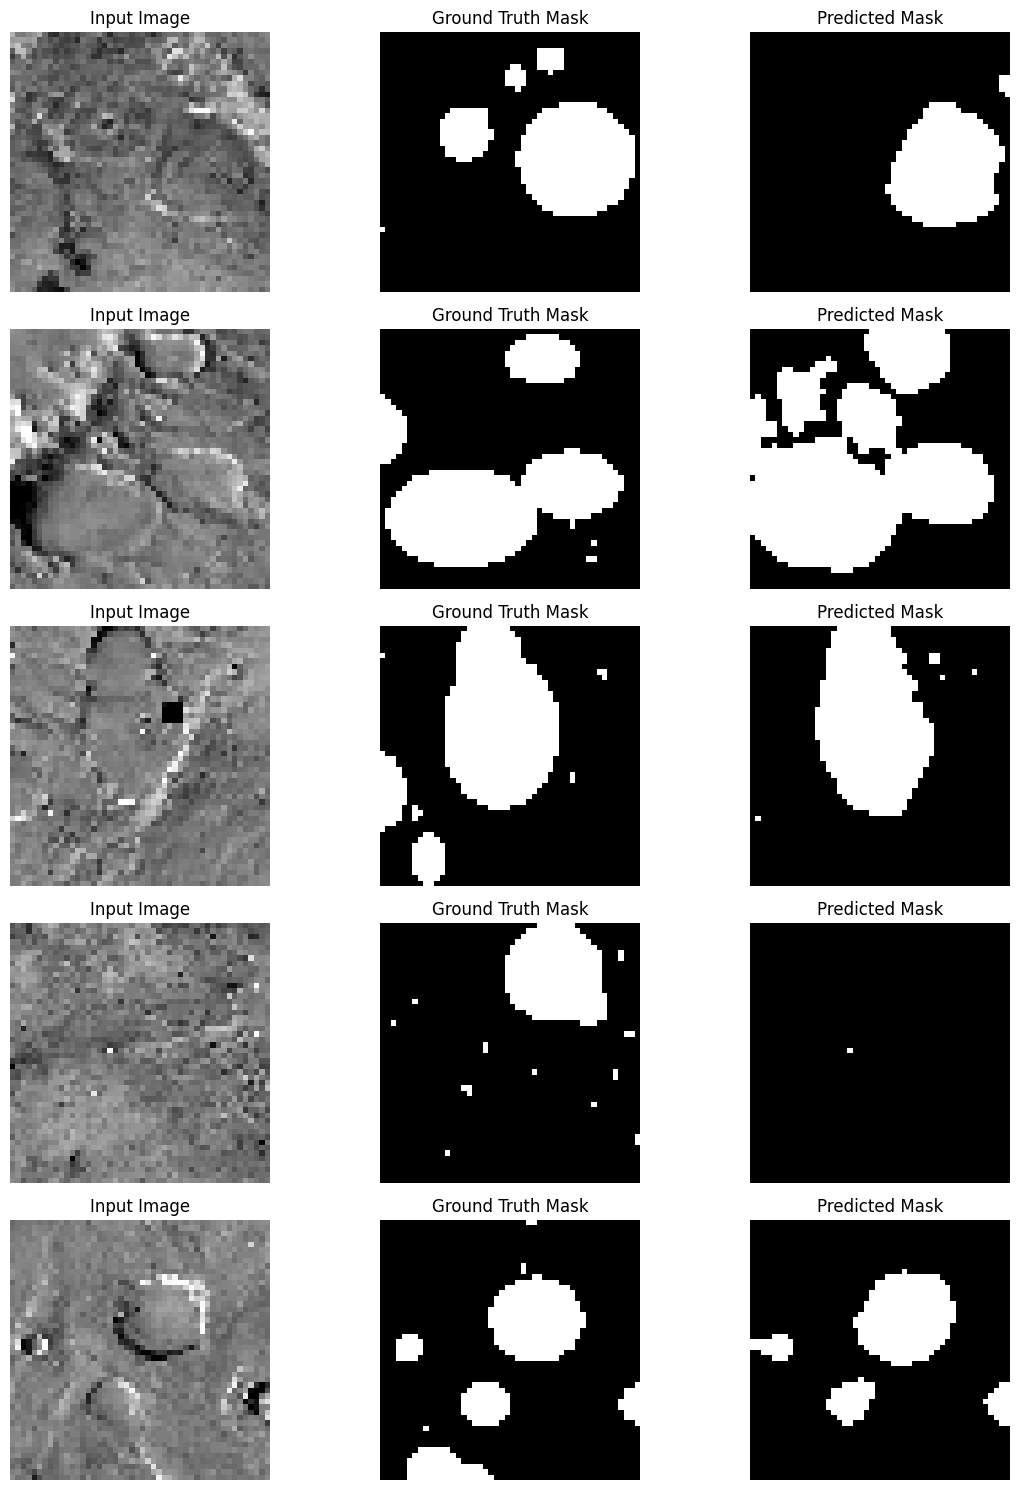

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

def plot_predictions_and_evaluate(model, X_val, y_val, num_samples=5):
    # Step 1: Get predictions for the entire validation set
    y_pred_val = model.predict(X_val)
    
    # Step 2: Binarize the predictions (thresholding at 0.5)
    y_pred_val_bin = (y_pred_val > 0.5).astype(np.uint8)
    
    # Step 3: Flatten the predictions and ground truth for evaluation
    y_pred_flat = y_pred_val_bin.flatten()
    y_true_flat = y_val.flatten()
    
    # Step 4: Compute evaluation metrics
    print("\nEvaluation Metrics:")
    print("Classification Report:\n", classification_report(y_true_flat, y_pred_flat))
    print("Confusion Matrix:\n", confusion_matrix(y_true_flat, y_pred_flat))
    balanced_acc = balanced_accuracy_score(y_true_flat, y_pred_flat)
    print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
    
    # Step 5: Visualize a few random samples with ground truth and predicted masks
    indices = np.random.choice(len(X_val), num_samples, replace=False)
    
    plt.figure(figsize=(12, num_samples * 3))
    
    for i, idx in enumerate(indices):
        # Get the image, true mask, and predicted mask
        image = X_val[idx]
        true_mask = y_val[idx]
        predicted_mask = y_pred_val_bin[idx]  # Use already binarized prediction
        
        # Plot the input image
        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title('Input Image')
        plt.axis('off')
        
        # Plot the ground truth mask
        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')
        
        # Plot the predicted mask
        plt.subplot(num_samples, 3, i * 3 + 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')
    
    plt.tight_layout()
    # Save the figure
    plt.savefig("/kaggle/working/predictions_unet.png")
    plt.show()

# Call the function to visualize predictions and evaluate the model
plot_predictions_and_evaluate(model, X_test_split, y_test_split, num_samples=5)